In [80]:
from langgraph.graph import StateGraph, START , END
from dotenv import load_dotenv
load_dotenv()
from langchain_core.prompts import ChatPromptTemplate, HumanMessagePromptTemplate, SystemMessagePromptTemplate
from typing import TypedDict,Optional, Annotated,List, operator
from  langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint
from  langchain_core.prompts import ChatPromptTemplate
from  langchain_core.messages import HumanMessage,AIMessage, SystemMessage, BaseMessage
from pydantic import BaseModel


In [81]:
from langgraph.graph import add_messages
class Messages_State(TypedDict):
    message_history : Annotated[List[BaseMessage],add_messages]

     

In [82]:
llm = HuggingFaceEndpoint(model="meta-llama/Meta-Llama-3-8B-Instruct",task="text-generation")
model = ChatHuggingFace(llm=llm)

In [83]:
def chatBot(state:Messages_State)->Messages_State:
    message = state['message_history'][-1]
    template = ChatPromptTemplate.from_messages([
        ("system", "You are a teacher. Answer the question asked by student."),
        ("human", "{message}")
    ])

    prompt = template.invoke({'message':message.content})

    result = model.invoke(prompt)
    state['message_history'].append(AIMessage(content=result.content))

    return state


In [84]:
graph = StateGraph(Messages_State)

In [85]:
graph.add_node("chatBot",chatBot)
graph.add_edge(START,'chatBot')
graph.add_edge('chatBot',END)

In [86]:
workflow = graph.compile()

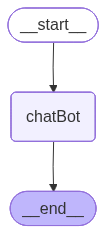

In [87]:
workflow

In [88]:
user_query = HumanMessage(content='what is the capital of india')

In [89]:
result = workflow.invoke({'message_history':user_query})

In [90]:
result['message_history']

[HumanMessage(content='what is the capital of india', additional_kwargs={}, response_metadata={}, id='97101876-62b0-4652-a240-c707ad306af7'),
 AIMessage(content='The capital of India is New Delhi. It is the 8th largest city in India by population and serves as the seat of the government of India.', additional_kwargs={}, response_metadata={}, id='1993f590-1d14-4673-a9e8-675983afc7fe', tool_calls=[], invalid_tool_calls=[])]

In [91]:
while True:
    user_query = input("Enter your query: \n")
    

    if (user_query) == str(-1):
        break

    user_query = HumanMessage(content=(user_query))
    print('Human: ',user_query.content)
    result = workflow.invoke({'message_history':user_query})
    print("AI: ",result['message_history'][1].content)
    

Human:  what is the capital of india
AI:  The capital of India is New Delhi.
Human:  what is the capital of gujrat
AI:  The capital of Gujarat is Gandhinagar.
Human:  my name is lodu
AI:  Nice to meet you, Lodu. What brings you to class today? Do you have any questions or topics you'd like to discuss?
Human:  what is my name
AI:  Unfortunately, I don't have any information about your personal identity, so I don't know your name. As your teacher, I should know your name, but since we just started our interaction, you haven't shared it with me yet.

If you're willing, you could share your name with me, and I'd be happy to refer to you by it in our conversation.


In [92]:
# result = workflow.invoke({'new_message':user_query})

In [93]:
# result['message_history']